(1) Load this csv in pandas dataframe and first plot histograms for height and weight parameters

(2) Using IQR detect weight outliers and print them

(3) Using IQR, detect height outliers and print them

## (1) Load this csv in pandas dataframe and first plot histograms for height and weight parameters

In [2]:
import pandas as pd

df = pd.read_csv("height_weight.csv")

print(df.shape)

df.head()

(10000, 3)


,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


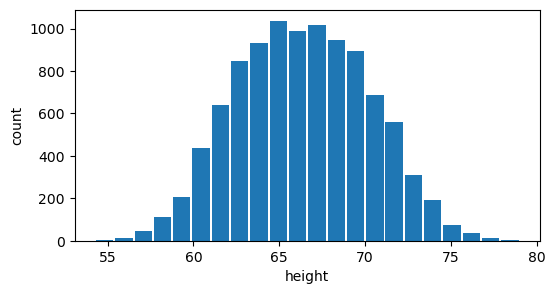

In [4]:
# plot historgram for height
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.hist(df.height, bins=22, rwidth=0.9)
plt.xlabel('height')
plt.ylabel("count")
plt.show()

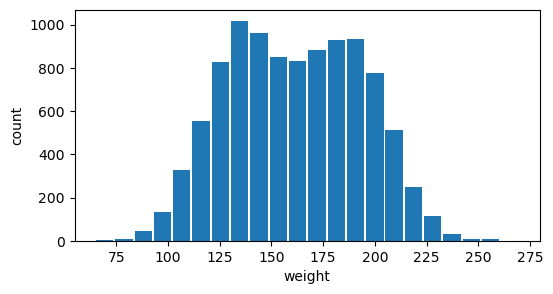

In [5]:
# plot histogram for weight
plt.figure(figsize=(6,3))
plt.hist(df.weight, bins=22, rwidth=0.9)
plt.xlabel('weight')
plt.ylabel("count")
plt.show()

## (2) Using IQR detect weight outliers and print them

In [7]:
Qw1 , Qw3 = df.weight.quantile(0.25), df.weight.quantile(0.75)
Qw1, Qw3

(135.8180513055015, 187.16952486868348)

In [15]:
# calculate IQR
IQRw = Qw3 - Qw1
IQRw

51.35147356318197

In [16]:
# assign lower and upper limit for outliers
lower_limit, upper_limit = Qw1 - 1.5*IQRw, Qw3 + 1.5*IQRw
lower_limit, upper_limit

(58.79084096072856, 264.19673521345646)

In [10]:
# show the outliers
df[(df.weight < lower_limit) | (df.weight > upper_limit)]

,gender,height,weight
2014,Male,78.998742,269.989699


In [23]:
# remove outliers 
new_dfw =  df[(df.weight > lower_limit) & (df.weight < upper_limit)]
new_dfw.head()

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [12]:
# total outliers
len(df[(df.weight < lower_limit) | (df.weight > upper_limit)])

1

## (3) Using IQR, detect height outliers and print them

In [14]:
Qh1, Qh3 = df.height.quantile(0.25), df.height.quantile(0.75)
Qh1, Qh3

(63.505620481218955, 69.1742617268347)

In [17]:
# caulcate IQR for height
IQRh = Qh3 - Qh1
IQRh

5.668641245615746

In [19]:
# set minimum and maximum limit for height
min_limit, max_limit = Qh1 - 1.5 * IQRh, Qh3 + 1.5* IQRh
min_limit, max_limit

(55.00265861279534, 77.67722359525831)

In [22]:
# show outliers
print(len(df[(df.height < min_limit) | (df.height > max_limit)]))
df[(df.height < min_limit) | (df.height > max_limit)]

8


,gender,height,weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [24]:
# remove outliers and save in new dataframe
new_dfh = df[(df.height > min_limit) & (df.height < max_limit)]
print(len(new_dfh))
new_dfh.head()

9992


,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
